### **1. Mô tả bộ dataset**
Dataset từ Kaggle cung cấp dữ liệu gồm các bài báo với tiêu đề, nội dung, và nhãn.  
- **Cột dữ liệu chính**:
  - `title`: Tiêu đề bài báo.
  - `text`: Nội dung bài báo.
  - `label`: Nhãn, với:
    - 0: Tin giả.
    - 1: Tin thật.  
- **Đặc điểm**:
  - Bộ dữ liệu có số lượng lớn các bản ghi, giúp đào tạo và kiểm tra các mô hình học máy.

---

### **2. Mô tả bài toán**
**Bài toán**: Phân loại một bài báo là thật hay giả dựa trên tiêu đề và nội dung.  
- **Loại bài toán**: Classification (Supervised Learning).  
- **Mục tiêu**:  
  - Xây dựng mô hình dự đoán chính xác nhãn (`label`) của bài báo dựa trên tiêu đề và nội dung.
  - Đo lường hiệu suất mô hình qua độ chính xác, ma trận nhầm lẫn, và báo cáo phân loại.

---

### **3. Phương pháp thực hiện**
  - Sử dụng CNN.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LR/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LR/data/evaluation.csv
/content/gdrive/MyDrive/LR/data/train.csv
/content/gdrive/MyDrive/LR/data/test.csv


In [ ]:
import pandas as pd

# Tải dữ liệu từ các tệp CSV
train = pd.read_csv("/content/gdrive/MyDrive/LR/data/train.csv", delimiter=';')
test = pd.read_csv("/content/gdrive/MyDrive/LR/data/test.csv", delimiter=';')
eval = pd.read_csv("/content/gdrive/MyDrive/LR/data/evaluation.csv", delimiter=';')

# Kiểm tra thông tin dữ liệu
print(train.head())
print(test.head())
print(eval.head())


   Unnamed: 0                                              title  \
0           0  Palestinians switch off Christmas lights in Be...   
1           1  China says Trump call with Taiwan president wo...   
2           2   FAIL! The Trump Organization’s Credit Score W...   
3           3  Zimbabwe military chief's China trip was norma...   
4           4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0  
   Unnamed: 0                                              title  \
0           0  Live from New York, it's a Trump-Clinton remat...   
1           1  Catalan separatists to lose majority in tight ...   
2           2  

Tiền xử lý dữ liệu văn bản (tokenize, xóa stopwords, và vector hóa).

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Kết hợp tiêu đề và nội dung tin tức thành một chuỗi văn bản
X_train = train['title'].values + " " + train['text'].values
X_test = test['title'].values + " " + test['text'].values
X_eval = eval['title'].values + " " + eval['text'].values

# Nhãn (label) cho các tập dữ liệu
y_train = train['label'].values
y_test = test['label'].values
y_eval = eval['label'].values

# Vector hóa văn bản
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
X_eval = vectorizer.transform(X_eval).toarray()


Mô hình CNN sẽ bao gồm các lớp Conv1D để áp dụng bộ lọc (filters) lên các đoạn văn bản (thường là một chuỗi các từ). Sau đó, sử dụng lớp MaxPooling1D để giảm chiều không gian, và cuối cùng kết nối các đặc trưng học được với các lớp dense (fully connected) để phân loại.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding

# Mô hình CNN
model = Sequential()

# Lớp Embedding
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))

# Lớp Conv1D và MaxPooling
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Lớp Conv1D thứ hai
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Lớp Flatten và Dense
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Huấn luyện mô hình trên dữ liệu huấn luyện.

In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 1389s 4s/step - accuracy: 0.5231 - loss: 0.8089 - val_accuracy: 0.5376 - val_loss: 0.6904
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 1419s 4s/step - accuracy: 0.5422 - loss: 0.8229 - val_accuracy: 0.5376 - val_loss: 0.6903
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 1390s 4s/step - accuracy: 0.5467 - loss: 0.6891 - val_accuracy: 0.5376 - val_loss: 0.6907
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 1347s 4s/step - accuracy: 0.5451 - loss: 0.6892 - val_accuracy: 0.5376 - val_loss: 0.6904
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 1458s 4s/step - accuracy: 0.5435 - loss: 0.6895 - val_accuracy: 0.5376 - val_loss: 0.6904


Đánh giá mô hình trên tập test và xem kết quả qua độ chính xác và các chỉ số khác.

254/254 ━━━━━━━━━━━━━━━━━━━━ 111s 437ms/step - accuracy: 0.5391 - loss: 0.6902
Accuracy: 53.76%
254/254 ━━━━━━━━━━━━━━━━━━━━ 110s 432ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3753
           1       0.54      1.00      0.70      4364

    accuracy                           0.54      8117
   macro avg       0.27      0.50      0.35      8117
weighted avg       0.29      0.54      0.38      8117



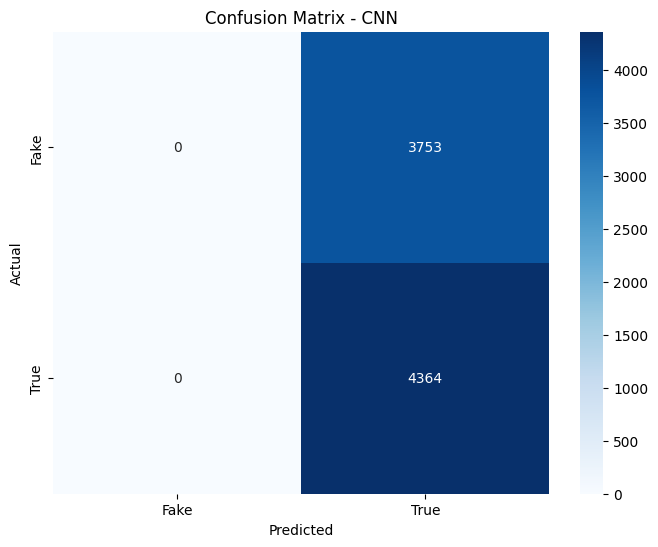

In [ ]:
# Đánh giá mô hình trên tập test
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1]*100:.2f}%')

# Dự đoán trên tập test
y_pred_cnn = (model.predict(X_test) > 0.5)

# Hiển thị classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cnn))

# Vẽ ma trận nhầm lẫn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

# Biểu đồ confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()



### Nhận xét kết quả

Bảng kết quả này cho thấy mô hình hoạt động không hiệu quả:

1. **Precision và Recall của lớp 0 (Fake News)**:
   - Precision, Recall, và F1-Score của lớp 0 đều bằng **0.00**.
   - Điều này nghĩa là mô hình không phát hiện được bất kỳ mẫu nào thuộc lớp 0. Đây là một vấn đề nghiêm trọng, đặc biệt với dữ liệu phân loại không cân bằng.

2. **Precision và Recall của lớp 1 (Real News)**:
   - Precision của lớp 1 là **0.54**, nhưng Recall đạt **1.00**.
   - Mô hình dự đoán tất cả các mẫu là lớp 1, dẫn đến tỷ lệ Recall cao nhưng Precision thấp.

3. **Độ chính xác tổng thể (Accuracy)**:
   - Accuracy chỉ đạt **54%**, phản ánh rõ sự mất cân bằng khi mô hình chỉ đoán đúng một lớp duy nhất.

### Kết luận
- Kết quả này cho thấy mô hình đã gặp vấn đề về **bias lớp** và không thể phân biệt hai lớp. Có thể cần cải thiện bằng cách cân bằng dữ liệu hoặc thử các thuật toán khác.